# PHASE 1 PROJECT

## Predictive Exploratory Analysis: Case Study Microsoft Company

### Best Movie Service Analysis 

### Import Libraries 

In [35]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [36]:
#load data on movie gross
bom_gross = pd.read_csv("bom.movie_gross.csv")
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
#load data on movie basics
imdb_title = pd.read_csv("title.basics.csv")
imdb_title.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [38]:
#load data on movie ratings
imdb_rating = pd.read_csv("title.ratings.csv")
imdb_rating.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


### Data Wrangling

#### Dropping Columns

##### Only consider the relevant rows and features for the study. The irrevant features will be dropped and join the final datasets

In [39]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [40]:
# Drop missing values for 'foreign_gross' and 'domestic_gross'
bom_gross.dropna(subset=['foreign_gross', 'domestic_gross'], inplace=True)

In [41]:
# Select relevant columns in bom gross 
bom_gross= bom_gross[["title", "foreign_gross", "domestic_gross", "year"]]
bom_gross.head()

,title,foreign_gross,domestic_gross,year
0,Toy Story 3,652000000,415000000.0,2010
1,Alice in Wonderland (2010),691300000,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,664300000,296000000.0,2010
3,Inception,535700000,292600000.0,2010
4,Shrek Forever After,513900000,238700000.0,2010


In [42]:
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(str)
# Remove commas from 'foreign_gross' column
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].str.replace(',', '')

# Convert 'foreign_gross' column to float
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)

In [43]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   foreign_gross   2009 non-null   float64
 2   domestic_gross  2009 non-null   float64
 3   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 78.5+ KB


In [44]:
# Calculate the sum of 'foreign_gross' and 'domestic_gross' for each row
bom_gross['total_gross'] = bom_gross['foreign_gross'] + bom_gross['domestic_gross']
bom_gross.head()

,title,foreign_gross,domestic_gross,year,total_gross
0,Toy Story 3,652000000.0,415000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),691300000.0,334200000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,664300000.0,296000000.0,2010,9.603000e+08
3,Inception,535700000.0,292600000.0,2010,8.283000e+08
4,Shrek Forever After,513900000.0,238700000.0,2010,7.526000e+08


In [45]:
# Select relevant columns in bom gross 
bom_gross= bom_gross[["title", "total_gross", "year"]]
bom_gross.head()

,title,total_gross,year
0,Toy Story 3,1.067000e+09,2010
1,Alice in Wonderland (2010),1.025500e+09,2010
2,Harry Potter and the Deathly Hallows Part 1,9.603000e+08,2010
3,Inception,8.283000e+08,2010
4,Shrek Forever After,7.526000e+08,2010


In [77]:
# Filter movies from 2014-2019
bom_gross = bom_gross[(bom_gross['year'] > 2013)]

In [47]:
#Filter movies with gross earnings > $27.9mil
bom_gross = bom_gross[(bom_gross['total_gross'] > 27900000)]

In [78]:
bom_gross

,title,total_gross,year
1477,Transformers: Age of Extinction,1.104000e+09,2014
1478,The Hobbit: The Battle of the Five Armies,9.560000e+08,2014
1479,Guardians of the Galaxy,7.734000e+08,2014
1480,Maleficent,7.585000e+08,2014
1481,The Hunger Games: Mockingjay - Part 1,7.553000e+08,2014
...,...,...,...
3185,The Girl in the Spider's Web: A New Dragon Tat...,3.510000e+07,2018
3186,The Hate U Give,3.490000e+07,2018
3188,Nobody's Fool,3.350000e+07,2018
3189,Bad Times At The El Royale,3.180000e+07,2018


##### IMDb Data Sets

In [80]:
#join the two imdb datasets
imdbreviews = imdb_title.join(imdb_rating.set_index('tconst'), how = 'inner', on = 'tconst', rsuffix = 'r')
imdbreviews.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [81]:
# Filter movies from 2014-2019
imdbreviews = imdbreviews[(imdbreviews['start_year'] > 2013)]

In [83]:
#Select relevant columns
imdbreviews = imdbreviews[["primary_title", "start_year", "genres", "averagerating"]]
imdbreviews

,primary_title,start_year,genres,averagerating
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,The Other Side of the Wind,2018,Drama,6.9
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
6,Bigfoot,2017,"Horror,Thriller",4.1
...,...,...,...,...
146115,Diabolik sono io,2019,Documentary,6.2
146122,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,Albatross,2017,Documentary,8.5
146129,La vida sense la Sara Amat,2019,NaN,6.6


In [52]:
#Drop columns with genres missing values 
imdbreviews.dropna(subset=['genres'], inplace=True)

In [53]:
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51475 entries, 0 to 146134
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  51475 non-null  object 
 1   start_year     51475 non-null  int64  
 2   genres         51475 non-null  object 
 3   averagerating  51475 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [84]:
#Rename primary_title and start-year to match bom_gross dataset
imdbreviews= imdbreviews.rename(columns={'primary_title': 'title', 'start_year': 'year'})
imdbreviews.head()

,title,year,genres,averagerating
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,The Other Side of the Wind,2018,Drama,6.9
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
6,Bigfoot,2017,"Horror,Thriller",4.1


In [85]:
#Split the genre
imdbreviews = imdbreviews.assign(genres = imdbreviews['genres'].str.split(',')).explode('genres')
imdbreviews.head()

,title,year,genres,averagerating
1,One Day Before the Rainy Season,2019,Biography,7.2
1,One Day Before the Rainy Season,2019,Drama,7.2
2,The Other Side of the Wind,2018,Drama,6.9
3,Sabse Bada Sukh,2018,Comedy,6.1
3,Sabse Bada Sukh,2018,Drama,6.1


In [56]:
#count the number of movies per genre per title
imdbreviews2 = imdbreviews.groupby('genres', as_index=False).title.nunique().sort_values(by='title', ascending=False)
imdbreviews2.rename(columns={'title': 'count'}, inplace=True)
imdbreviews2.head()

,genres,count
8,Drama,20853
7,Documentary,12249
5,Comedy,11969
23,Thriller,5881
13,Horror,5394


In [86]:
#Count of most common genre per year
imdbreviews3 = imdbreviews.groupby(['year', 'genres']).size().reset_index(name='most_common')
imdbreviews3.head()

,year,genres,most_common
0,2014,Action,773
1,2014,Adventure,454
2,2014,Animation,191
3,2014,Biography,603
4,2014,Comedy,1987


In [87]:
imdbreviews4 = imdbreviews3.groupby('year').apply(lambda x: x.nlargest(3, 'most_common')).reset_index(drop=True)
imdbreviews4.head()

,year,genres,most_common
0,2014,Drama,3529
1,2014,Documentary,2154
2,2014,Comedy,1987
3,2015,Drama,3629
4,2015,Documentary,2106


In [88]:
# Join the two datasets based on the 'year' column
merged_df = pd.merge(bom_gross, imdbreviews, on='title')
merged_df

,title,total_gross,year_x,year_y,genres,averagerating
0,Transformers: Age of Extinction,1.104000e+09,2014,2014,Action,5.7
1,Transformers: Age of Extinction,1.104000e+09,2014,2014,Adventure,5.7
2,Transformers: Age of Extinction,1.104000e+09,2014,2014,Sci-Fi,5.7
3,The Hobbit: The Battle of the Five Armies,9.560000e+08,2014,2014,Adventure,7.4
4,The Hobbit: The Battle of the Five Armies,9.560000e+08,2014,2014,Fantasy,7.4
...,...,...,...,...,...,...
1425,Nobody's Fool,3.350000e+07,2018,2018,Comedy,4.6
1426,Nobody's Fool,3.350000e+07,2018,2018,Drama,4.6
1427,Nobody's Fool,3.350000e+07,2018,2018,Romance,4.6
1428,Baaghi 2,3.120000e+07,2018,2018,Action,5.0


In [89]:
merged_df = merged_df[['total_gross', 'genres', 'averagerating']]
merged_df.head()

,total_gross,genres,averagerating
0,1.104000e+09,Action,5.7
1,1.104000e+09,Adventure,5.7
2,1.104000e+09,Sci-Fi,5.7
3,9.560000e+08,Adventure,7.4
4,9.560000e+08,Fantasy,7.4


In [90]:
#Select average ratings above 7.5
merged_df1 = merged_df[merged_df['averagerating'] > 7.5]
merged_df1

,total_gross,genres,averagerating
5,773400000.0,Action,8.1
6,773400000.0,Adventure,8.1
7,773400000.0,Comedy,8.1
14,747800000.0,Action,8.0
15,747800000.0,Adventure,8.0
...,...,...,...
1375,66300000.0,Comedy,7.6
1376,66300000.0,Drama,7.6
1377,66300000.0,Romance,7.6
1381,65900000.0,Comedy,7.6


### Exploratory Data Analysis

#### Movie title with most genres

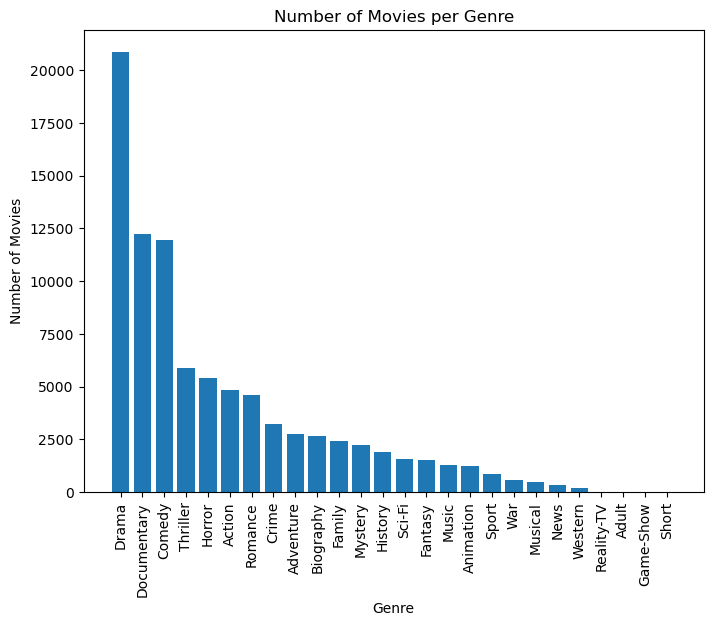

In [62]:
plt.figure(figsize=(8, 6))
genres = imdbreviews2['genres']
count = imdbreviews2['count']

plt.bar(genres, count)


plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=90)


plt.show()

The graph shows that drama genre had the highest number movies revolving around the given titles. It was followed by documentary and comedy movies. Other movies had less than 10,000 total of the movie titles

#### Most common genres over the study period

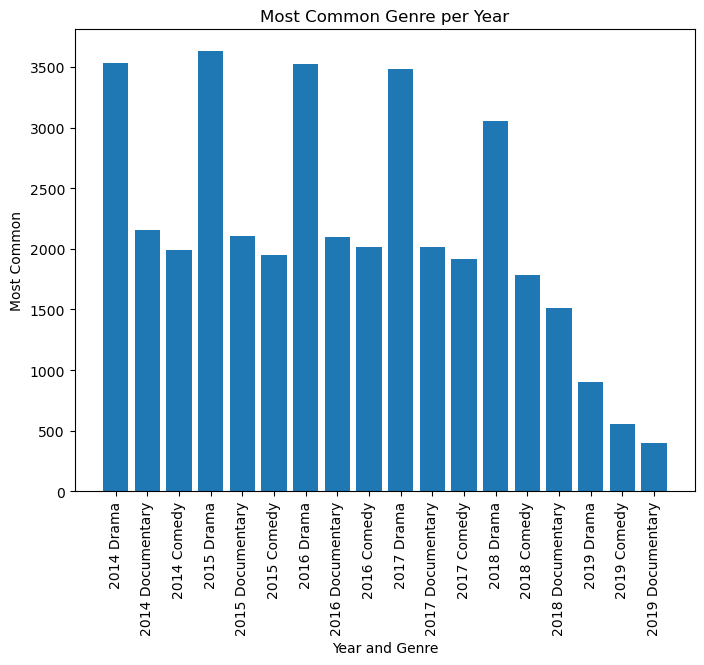

In [92]:
# Create a bar plot for threee most common genre counts per year
plt.figure(figsize=(8, 6))
plt.bar(imdbreviews4['year'].astype(str) + ' ' + imdbreviews4['genres'], imdbreviews4['most_common'])
plt.xlabel('Year and Genre')
plt.ylabel('Most Common')
plt.title('Most Common Genre per Year')
plt.xticks(rotation=90)

plt.show()

It is evident that the three most common genres from 2014 to 2019 are drama, documentary and comedy. However, there is a decline over the production period, with the 2019 production being less than 1,000 for the three genres.

#### Genres by Gross Earnings per Movie (US$ million)

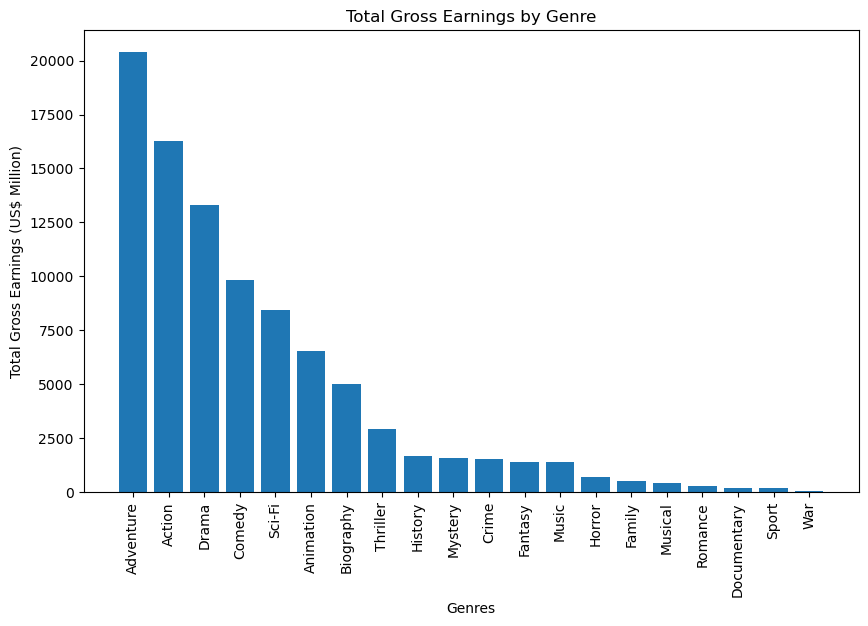

In [73]:
# Group by genres and calculate the total gross earnings and divide total gross by 1 million
merged_df1.loc[:, 'total_gross'] /= 1e6
total_gross = merged_df1.groupby('genres')['total_gross'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_gross.index, total_gross.values)
plt.xlabel('Genres')
plt.ylabel('Total Gross Earnings (US$ Million)')
plt.title('Total Gross Earnings by Genre')
plt.xticks(rotation=90)
plt.show()

Adventure, action and drama are the three leading genres based on income generated from sales, within and outside the domestic market

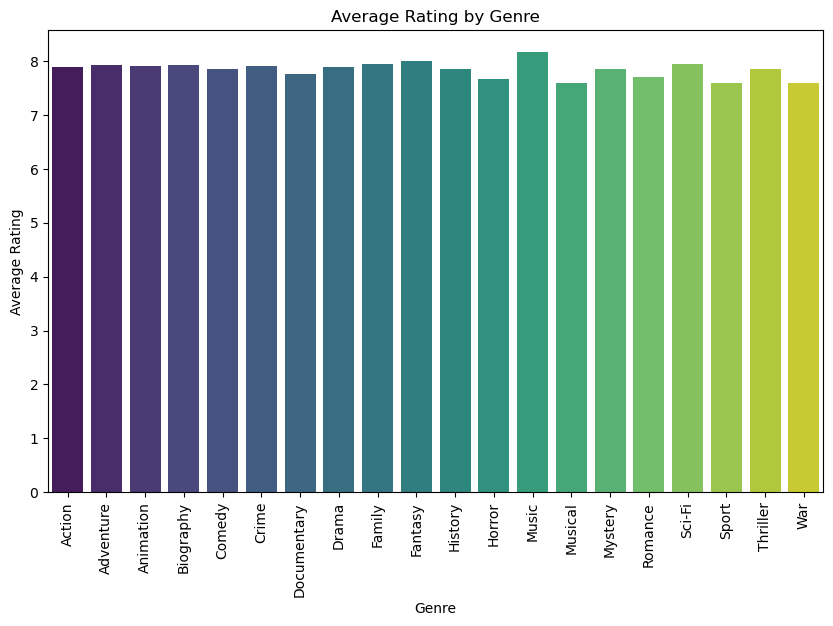

In [65]:
# Group by year and genre and calculate the average rating
grouped_data = merged_df1.groupby(['genres'])['averagerating'].mean().reset_index()

# Plotting the grouped data
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='genres', y='averagerating', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.show()

Music movies had the highest average ratingsc of above 8.0.

